In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Processing Cleaned Data

In [2]:
# Load the data
df = pd.read_csv('Chicago_Crimes_2012_to_2017_cleaned.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4563 entries, 0 to 4562
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Block                 4563 non-null   int64  
 1   IUCR                  4563 non-null   int64  
 2   Primary Type          4563 non-null   int64  
 3   Description           4563 non-null   int64  
 4   Location Description  4563 non-null   int64  
 5   Arrest                4563 non-null   bool   
 6   Domestic              4563 non-null   bool   
 7   Beat                  4563 non-null   int64  
 8   District              4563 non-null   float64
 9   Ward                  4563 non-null   float64
 10  Community Area        4563 non-null   float64
 11  FBI Code              4563 non-null   int64  
 12  X Coordinate          4563 non-null   float64
 13  Y Coordinate          4563 non-null   float64
 14  Year                  4563 non-null   int64  
 15  Latitude             

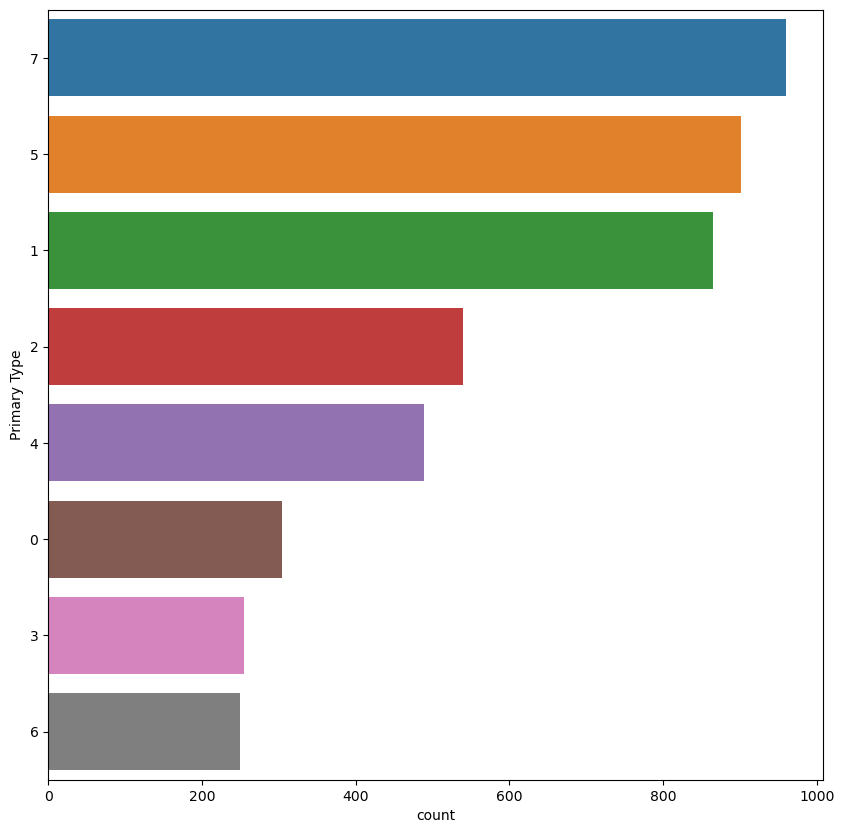

In [3]:
# get the target variable
df['Primary Type'].value_counts()
# print the target variable as plot 
plt.figure(figsize=(10,10))
sns.countplot(y='Primary Type', data=df, order = df['Primary Type'].value_counts().index)
plt.show()

In [4]:
# Calculate correlation between features and target variable
correlation_matrix = df.corr()
print(correlation_matrix['Primary Type'].sort_values(ascending=False))

Primary Type            1.000000
Location Description    0.130209
Y Coordinate            0.114857
Latitude                0.114544
Description             0.104756
Ward                    0.093530
IUCR                    0.051221
Beat                    0.043196
District                0.042808
Hour                    0.028927
Longitude               0.015165
X Coordinate            0.013299
Second                  0.008055
Arrest                  0.005836
Day                     0.003347
Year                   -0.020271
Month                  -0.029788
Block                  -0.038227
Location               -0.051359
FBI Code               -0.078381
Community Area         -0.096168
Minute                 -0.111506
Domestic               -0.302112
Name: Primary Type, dtype: float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4563 entries, 0 to 4562
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Block                 4563 non-null   int64  
 1   IUCR                  4563 non-null   int64  
 2   Primary Type          4563 non-null   int64  
 3   Description           4563 non-null   int64  
 4   Location Description  4563 non-null   int64  
 5   Arrest                4563 non-null   bool   
 6   Domestic              4563 non-null   bool   
 7   Beat                  4563 non-null   int64  
 8   District              4563 non-null   float64
 9   Ward                  4563 non-null   float64
 10  Community Area        4563 non-null   float64
 11  FBI Code              4563 non-null   int64  
 12  X Coordinate          4563 non-null   float64
 13  Y Coordinate          4563 non-null   float64
 14  Year                  4563 non-null   int64  
 15  Latitude             

In [7]:
# Calculate correlation between features and target variable
correlation_matrix = df.corr()
print(correlation_matrix['Primary Type'].sort_values(ascending=False))

Primary Type            1.000000
Location Description    0.130209
Y Coordinate            0.114857
Latitude                0.114544
Description             0.104756
Ward                    0.093530
IUCR                    0.051221
Beat                    0.043196
District                0.042808
Hour                    0.028927
Longitude               0.015165
X Coordinate            0.013299
Arrest                  0.005836
Day                     0.003347
Year                   -0.020271
Month                  -0.029788
Block                  -0.038227
Location               -0.051359
FBI Code               -0.078381
Community Area         -0.096168
Minute                 -0.111506
Domestic               -0.302112
Name: Primary Type, dtype: float64


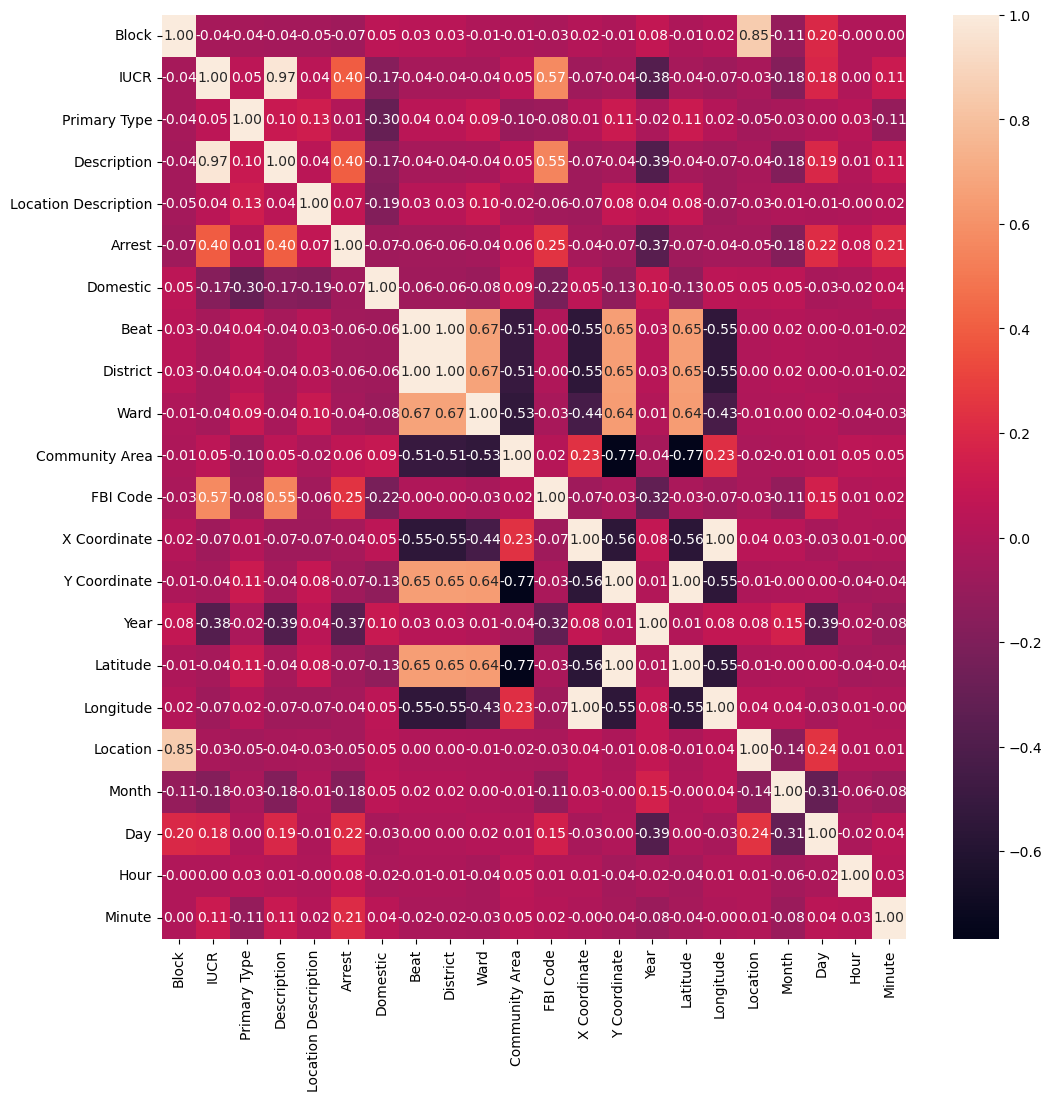

In [8]:
# Plot correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [9]:
most_correlated_features = correlation_matrix['Primary Type'].abs().sort_values(ascending=False)[1:] # Exclude the target variable itself
print(most_correlated_features)

Domestic                0.302112
Location Description    0.130209
Y Coordinate            0.114857
Latitude                0.114544
Minute                  0.111506
Description             0.104756
Community Area          0.096168
Ward                    0.093530
FBI Code                0.078381
Location                0.051359
IUCR                    0.051221
Beat                    0.043196
District                0.042808
Block                   0.038227
Month                   0.029788
Hour                    0.028927
Year                    0.020271
Longitude               0.015165
X Coordinate            0.013299
Arrest                  0.005836
Day                     0.003347
Name: Primary Type, dtype: float64


# Models & Evaluation

In [10]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('Primary Type', axis=1)
y = df['Primary Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



1 - **Baseline Model {ZeroR}**

In [11]:
# Base model (ZeroR)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 19.82%


2 - **SVM**

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Initialize the SVM classifier
svm_model_grid = SVC()

# Param grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly'] # Kernel type
}

# GridSearchCV with Early Stopping
grid_search = GridSearchCV(svm_model_grid, param_grid, cv=5, verbose=2, scoring='accuracy', return_train_score=True, refit=True)
print("Grid search initialized")
grid_search.fit(X_train, y_train)

Grid search initialized
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ..............

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [13]:
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best SVM Model Parameters: {best_params}")

# Best score
best_score = grid_search.best_score_
print(f"Best Score: {best_score * 100:.2f}%")

Best SVM Model Parameters: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Best Score: 86.25%


In [14]:
# Apply the best model to the test set
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.29%


[learning_curve] Training set sizes: [  29   88  147  206  265  324  383  442  501  560  619  678  737  796
  855  914  973 1032 1091 1150 1209 1268 1327 1386 1445 1504 1563 1622
 1681 1740 1799 1858 1917 1976 2035 2094 2153 2212 2271 2330 2389 2448
 2507 2566 2625 2684 2743 2802 2861 2920]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 250 | elapsed: 26.5min remaining: 26.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 63.0min finished


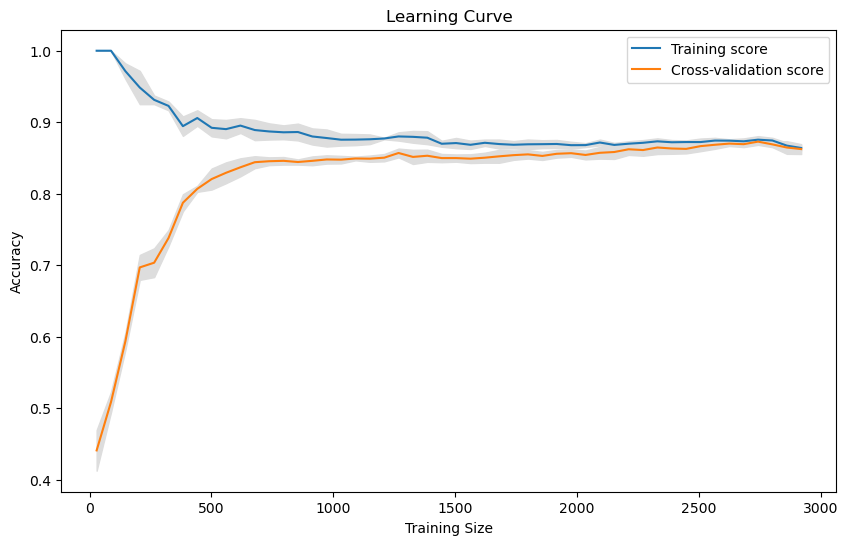

In [15]:
# Learning curve for the SVM model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_svm, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

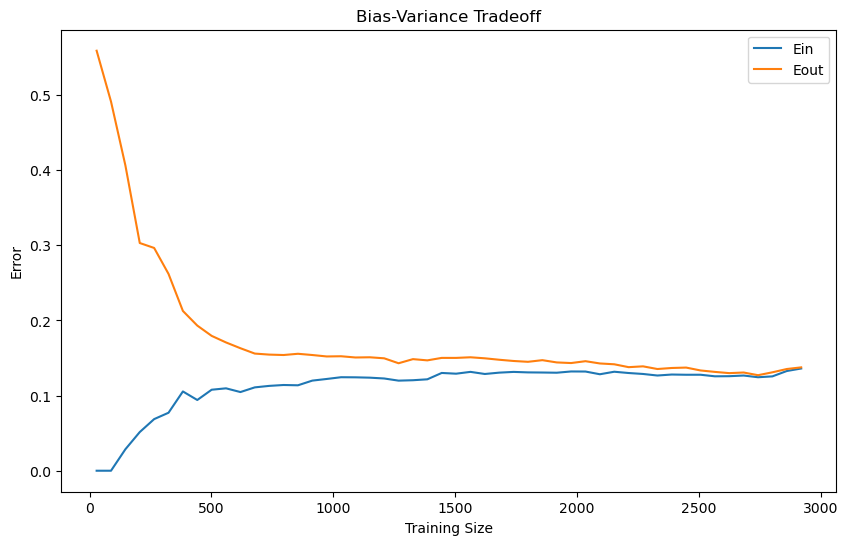

In [18]:
# Bias-Variance Tradeoff - Error vs training size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, 1 - train_mean, label='Ein')
plt.plot(train_sizes, 1 - test_mean, label='Eout')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Training Size')
plt.ylabel('Error')
plt.legend()
plt.show()


In [17]:
# Precision, Recall, F1 Score
from sklearn.metrics import classification_report

y_pred = best_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89        89
           1       0.97      0.95      0.96       183
           2       0.87      1.00      0.93        88
           3       0.92      0.20      0.32        56
           4       0.91      1.00      0.95        98
           5       0.67      0.89      0.77       171
           6       0.91      0.45      0.60        47
           7       0.96      1.00      0.98       181

    accuracy                           0.87       913
   macro avg       0.90      0.79      0.80       913
weighted avg       0.89      0.87      0.86       913



3 - **Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)

lr_params = { 'C': [0.1, 1, 10, 100], # Regularization parameter
               'penalty': ['l1', 'l2'], # Regularization type
               'solver': ['liblinear', 'saga' , 'lbfgs' , 'newton-cg' , 'sag' , 'newton-cholesky'] # Optimization algorithm
            }

lr_grid_search = GridSearchCV(lr_model, lr_params, cv=5, verbose=2, scoring='accuracy', return_train_score=True, refit=True)
print("Grid search initialized")
lr_grid_search.fit(X_train, y_train)



Grid search initialized
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.8s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.9s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.9s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.7s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.8s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   4.7s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   4.7s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   4.9s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   5.0s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   6.4s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......................C=10, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   4.8s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   4.8s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   4.9s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   4.8s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   5.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time=   4.1s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time=   4.3s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time=   4.0s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time=   4.2s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time=   4.3s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   2.3s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.9s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.7s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   2.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.8s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   1.1s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   1.1s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time=   3.3s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time=   3.6s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time=   3.7s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time=   3.9s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(se

[CV] END ......................C=100, penalty=l2, solver=sag; total time=   3.8s
[CV] END ..........C=100, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=100, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=100, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=100, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=100, penalty=l2, solver=newton-cholesky; total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg',
                                    'sag', 'newton-cholesky']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [20]:
# best model parameters
best_lr = lr_grid_search.best_estimator_
best_params = lr_grid_search.best_params_

print(f"Best Logistic Regression Model Parameters: {best_params}")


best_score = lr_grid_search.best_score_
print(f"Best Score: {best_score * 100:.2f}%")

Best Logistic Regression Model Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 78.52%


In [21]:
# Apply the best model to the test set
y_pred = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.22%


[learning_curve] Training set sizes: [  29   88  147  206  265  324  383  442  501  560  619  678  737  796
  855  914  973 1032 1091 1150 1209 1268 1327 1386 1445 1504 1563 1622
 1681 1740 1799 1858 1917 1976 2035 2094 2153 2212 2271 2330 2389 2448
 2507 2566 2625 2684 2743 2802 2861 2920]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 250 | elapsed:   37.3s remaining:   37.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished


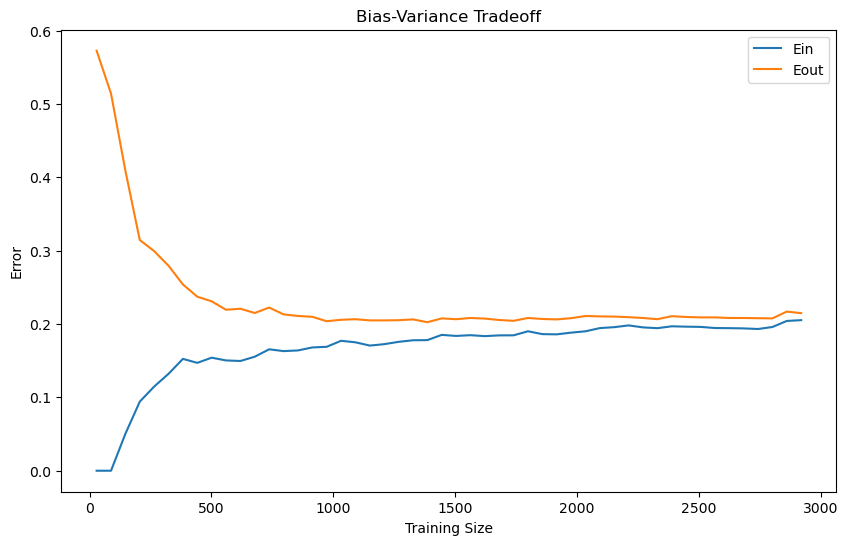

In [22]:
# Bias-Variance Tradeoff - Error vs training size
train_sizes, train_scores, test_scores = learning_curve(best_lr, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=2)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, 1 - train_mean, label='Ein')
plt.plot(train_sizes, 1 - test_mean, label='Eout')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Training Size')
plt.ylabel('Error')
plt.legend()
plt.show()


In [23]:
y_pred = best_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.40      0.57        89
           1       0.92      0.91      0.91       183
           2       0.63      0.98      0.76        88
           3       0.53      0.16      0.25        56
           4       0.88      1.00      0.93        98
           5       0.55      0.68      0.61       171
           6       0.83      0.43      0.56        47
           7       0.90      0.96      0.93       181

    accuracy                           0.77       913
   macro avg       0.77      0.69      0.69       913
weighted avg       0.79      0.77      0.75       913



4 - **Random Forest**

In [24]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model_grid = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
}

rf_grid_search = GridSearchCV(rf_model_grid, rf_param_grid, cv=5, verbose=2, scoring='accuracy', return_train_score=True, refit=True)
print("Grid search initialized")
rf_grid_search.fit(X_train, y_train)


Grid search initialized
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.5s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.8s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.8s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.8s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.9s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.8s
[CV] END ...................max_depth=None, n_estimators=300; total time=   1.3s
[CV] END ...............

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [25]:
# best model parameters
best_rf = rf_grid_search.best_estimator_
best_params = rf_grid_search.best_params_

print(f"Best Random Forest Model Parameters: {best_params}")

# Best score
best_score = rf_grid_search.best_score_
print(f"Best Score: {best_score * 100:.2f}%")

Best Random Forest Model Parameters: {'max_depth': None, 'n_estimators': 300}
Best Score: 96.93%


In [26]:
# Apply the best model to the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.93%


[learning_curve] Training set sizes: [  29   88  147  206  265  324  383  442  501  560  619  678  737  796
  855  914  973 1032 1091 1150 1209 1268 1327 1386 1445 1504 1563 1622
 1681 1740 1799 1858 1917 1976 2035 2094 2153 2212 2271 2330 2389 2448
 2507 2566 2625 2684 2743 2802 2861 2920]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 250 | elapsed:   35.8s remaining:   35.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.2min finished


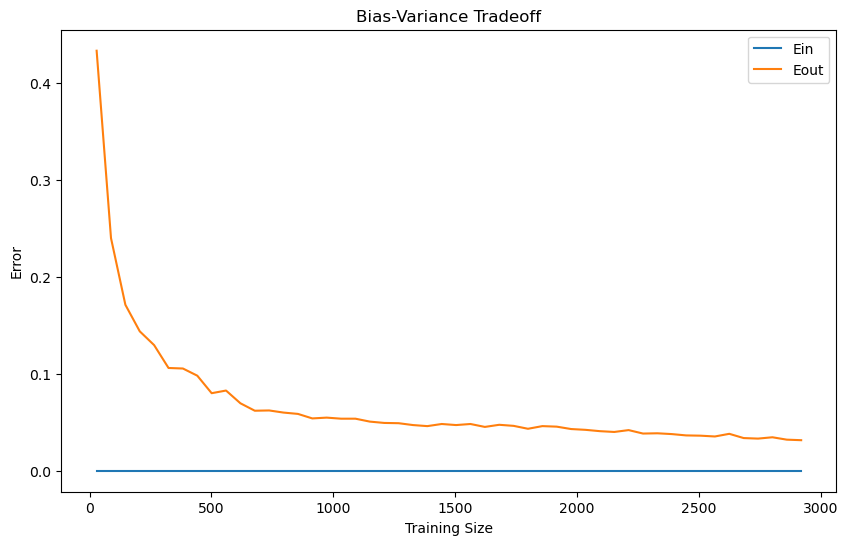

In [27]:
# Bias-Variance Tradeoff - Error vs training size
train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=2)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, 1 - train_mean, label='Ein')
plt.plot(train_sizes, 1 - test_mean, label='Eout')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Training Size')
plt.ylabel('Error')
plt.legend()
plt.show()

In [28]:
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        89
           1       0.99      1.00      1.00       183
           2       1.00      1.00      1.00        88
           3       0.96      0.82      0.88        56
           4       0.99      1.00      0.99        98
           5       0.89      0.98      0.93       171
           6       0.94      0.98      0.96        47
           7       1.00      1.00      1.00       181

    accuracy                           0.97       913
   macro avg       0.97      0.95      0.96       913
weighted avg       0.97      0.97      0.97       913



5 - **Perceptron**

In [29]:
from sklearn.linear_model import Perceptron
perceptron_model_grid = Perceptron()
# Param grid for hyperparameter tuning
param_grid_perceptron = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0], # Regularization parameter
    'max_iter': [1000, 2000, 3000], # Maximum number of passes over the training data
    'eta0': [0.1, 0.01, 0.001], # Learning rate
}

# GridSearchCV with Early Stopping
grid_search_perceptron = GridSearchCV(perceptron_model_grid, param_grid_perceptron, cv=5, verbose=2, scoring='accuracy', return_train_score=True, refit=True)
print("Grid search initialized")
grid_search_perceptron.fit(X_train, y_train)



Grid search initialized
Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ..............alpha=0.0001, eta0=0.1, max_iter=1000; total time=   0.0s
[CV] END ..............alpha=0.0001, eta0=0.1, max_iter=1000; total time=   0.0s
[CV] END ..............alpha=0.0001, eta0=0.1, max_iter=1000; total time=   0.0s
[CV] END ..............alpha=0.0001, eta0=0.1, max_iter=1000; total time=   0.0s
[CV] END ..............alpha=0.0001, eta0=0.1, max_iter=1000; total time=   0.0s
[CV] END ..............alpha=0.0001, eta0=0.1, max_iter=2000; total time=   0.0s
[CV] END ..............alpha=0.0001, eta0=0.1, max_iter=2000; total time=   0.0s
[CV] END ..............alpha=0.0001, eta0=0.1, max_iter=2000; total time=   0.0s
[CV] END ..............alpha=0.0001, eta0=0.1, max_iter=2000; total time=   0.0s
[CV] END ..............alpha=0.0001, eta0=0.1, max_iter=2000; total time=   0.0s
[CV] END ..............alpha=0.0001, eta0=0.1, max_iter=3000; total time=   0.0s
[CV] END ..............

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'eta0': [0.1, 0.01, 0.001],
                         'max_iter': [1000, 2000, 3000]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [30]:
# best model parameters
best_perceptron = grid_search_perceptron.best_estimator_
best_params = grid_search_perceptron.best_params_

print(f"Best Perceptron Model Parameters: {best_params}")

# Accuracy of the best model
best_accuracy = grid_search_perceptron.best_score_
print("Best model accuracy:", best_accuracy * 100 , "%")

Best Perceptron Model Parameters: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 1000}
Best model accuracy: 59.04109589041096 %


In [31]:
# Apply the best model to the test set
y_pred = best_perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 54.11%


[learning_curve] Training set sizes: [  29   88  147  206  265  324  383  442  501  560  619  678  737  796
  855  914  973 1032 1091 1150 1209 1268 1327 1386 1445 1504 1563 1622
 1681 1740 1799 1858 1917 1976 2035 2094 2153 2212 2271 2330 2389 2448
 2507 2566 2625 2684 2743 2802 2861 2920]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 250 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.1s finished


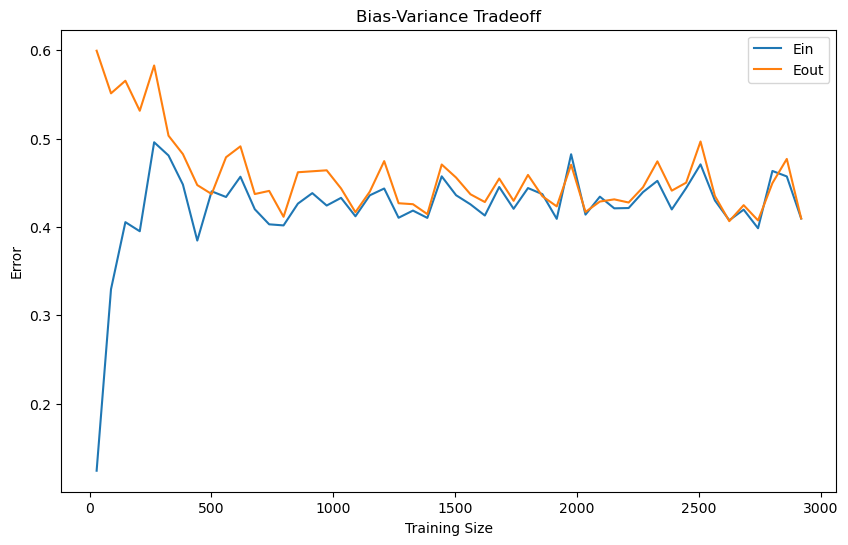

In [32]:
# Bias-Variance Tradeoff - Error vs training size
train_sizes, train_scores, test_scores = learning_curve(best_perceptron, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=2)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, 1 - train_mean, label='Ein')
plt.plot(train_sizes, 1 - test_mean, label='Eout')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Training Size')
plt.ylabel('Error')
plt.legend()
plt.show()


In [33]:
y_pred = best_perceptron.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.43      0.51        89
           1       0.89      0.72      0.80       183
           2       0.37      0.82      0.51        88
           3       0.16      0.11      0.13        56
           4       0.71      0.95      0.81        98
           5       0.27      0.18      0.22       171
           6       0.23      0.26      0.24        47
           7       0.62      0.61      0.61       181

    accuracy                           0.54       913
   macro avg       0.49      0.51      0.48       913
weighted avg       0.55      0.54      0.53       913

